In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.5
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.5_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.5_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	964.5920

Best Fitness:	927.0424
Solution:	900.0000
Diff:		27.0424

[0:06:22][----------] 1.96% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	959.6105

Best Fitness:	933.4349
Solution:	900.0000
Diff:		33.4349

[0:12:00][----------] 3.92% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	969.7785

Best Fitness:	940.8472
Solution:	900.0000
Diff:		40.8472

[0:17:41][#---------] 5.88% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	965.0787

Best Fitness:	937.5036
Solution:	900.0000
Diff:		37.5036

[0:23:52][#---------] 7.84% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	968.8013

Best Fitness:	935.3880
Solution:	900.0000
Diff:		35.3880

[0:29:30][#---------] 9.80% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.8796

Best Fitness:	936.6508
Solution:	900.0000
Diff:		36.6508

[0:35:13][#---------] 11.76% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	968.7041

Best Fitness:	936.4485
Solution:	900.0000
Diff:		36.4485

[0:40:35][#---------] 13.73% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	976.6836

Best Fitness:	948.7789
Solution:	900.0000
Diff:		48.7789

[0:45:43][##--------] 15.69% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	966.6803

Best Fitness:	938.9702
Solution:	900.0000
Diff:		38.9702

[0:50:32][##--------] 17.65% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.5533

Best Fitness:	936.6336
Solution:	900.0000
Diff:		36.6336

[0:55:19][##--------] 19.61% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	962.8956

Best Fitness:	935.3091
Solution:	900.0000
Diff:		35.3091

[1:00:17][##--------] 21.57% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.1314

Best Fitness:	930.7540
Solution:	900.0000
Diff:		30.7540

[1:05:15][##--------] 23.53% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	966.7518

Best Fitness:	933.1517
Solution:	900.0000
Diff:		33.1517

[1:10:04][###-------] 25.49% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	968.7837

Best Fitness:	931.1513
Solution:	900.0000
Diff:		31.1513

[1:15:00][###-------] 27.45% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.6067

Best Fitness:	939.6452
Solution:	900.0000
Diff:		39.6452

[1:19:56][###-------] 29.41% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	965.4606

Best Fitness:	935.8540
Solution:	900.0000
Diff:		35.8540

[1:24:56][###-------] 31.37% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.6659

Best Fitness:	935.5396
Solution:	900.0000
Diff:		35.5396

[1:29:38][###-------] 33.33% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	970.4749

Best Fitness:	942.8333
Solution:	900.0000
Diff:		42.8333

[1:34:31][####------] 35.29% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	966.2862

Best Fitness:	931.9998
Solution:	900.0000
Diff:		31.9998

[1:38:43][####------] 37.25% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	965.8013

Best Fitness:	938.2650
Solution:	900.0000
Diff:		38.2650

[1:42:56][####------] 39.22% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	963.9043

Best Fitness:	935.5307
Solution:	900.0000
Diff:		35.5307

[1:47:21][####------] 41.18% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	969.1699

Best Fitness:	942.8922
Solution:	900.0000
Diff:		42.8922

[1:51:32][####------] 43.14% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	971.6467

Best Fitness:	940.3692
Solution:	900.0000
Diff:		40.3692

[1:55:57][#####-----] 45.10% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	966.3419

Best Fitness:	931.5540
Solution:	900.0000
Diff:		31.5540

[2:00:22][#####-----] 47.06% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	966.6439

Best Fitness:	933.1501
Solution:	900.0000
Diff:		33.1501

[2:04:45][#####-----] 49.02% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.6386

Best Fitness:	937.6455
Solution:	900.0000
Diff:		37.6455

[2:08:57][#####-----] 50.98% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	958.9811

Best Fitness:	925.6791
Solution:	900.0000
Diff:		25.6791

[2:13:13][#####-----] 52.94% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	964.3770

Best Fitness:	932.7207
Solution:	900.0000
Diff:		32.7207

[2:17:31][#####-----] 54.90% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	961.7926

Best Fitness:	932.2090
Solution:	900.0000
Diff:		32.2090

[2:21:41][######----] 56.86% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	962.9717

Best Fitness:	935.7689
Solution:	900.0000
Diff:		35.7689

[2:25:28][######----] 58.82% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.9307

Best Fitness:	931.5217
Solution:	900.0000
Diff:		31.5217

[2:29:19][######----] 60.78% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	968.9348

Best Fitness:	936.2472
Solution:	900.0000
Diff:		36.2472

[2:33:07][######----] 62.75% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	969.0991

Best Fitness:	929.0395
Solution:	900.0000
Diff:		29.0395

[2:36:43][######----] 64.71% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	960.8577

Best Fitness:	934.7151
Solution:	900.0000
Diff:		34.7151

[2:40:25][#######---] 66.67% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	963.7205

Best Fitness:	935.4300
Solution:	900.0000
Diff:		35.4300

[2:44:04][#######---] 68.63% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.2251

Best Fitness:	937.4429
Solution:	900.0000
Diff:		37.4429

[2:47:55][#######---] 70.59% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	965.3120

Best Fitness:	938.4454
Solution:	900.0000
Diff:		38.4454

[2:51:41][#######---] 72.55% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	966.8341

Best Fitness:	938.9337
Solution:	900.0000
Diff:		38.9337

[2:55:27][#######---] 74.51% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	969.3525

Best Fitness:	935.4279
Solution:	900.0000
Diff:		35.4279

[2:59:06][########--] 76.47% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	969.2168

Best Fitness:	932.4066
Solution:	900.0000
Diff:		32.4066

[3:02:52][########--] 78.43% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	964.9409

Best Fitness:	937.0426
Solution:	900.0000
Diff:		37.0426

[3:06:12][########--] 80.39% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	968.5974

Best Fitness:	942.9008
Solution:	900.0000
Diff:		42.9008

[3:09:26][########--] 82.35% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	964.9158

Best Fitness:	928.7589
Solution:	900.0000
Diff:		28.7589

[3:12:34][########--] 84.31% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	969.9349

Best Fitness:	935.7534
Solution:	900.0000
Diff:		35.7534

[3:15:44][#########-] 86.27% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.1081

Best Fitness:	936.8452
Solution:	900.0000
Diff:		36.8452

[3:18:55][#########-] 88.24% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	965.8079

Best Fitness:	932.0459
Solution:	900.0000
Diff:		32.0459

[3:22:08][#########-] 90.20% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	968.7072

Best Fitness:	932.7515
Solution:	900.0000
Diff:		32.7515

[3:25:22][#########-] 92.16% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	966.7103

Best Fitness:	937.0746
Solution:	900.0000
Diff:		37.0746

[3:28:36][#########-] 94.12% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	967.1031

Best Fitness:	937.7639
Solution:	900.0000
Diff:		37.7639

[3:31:48][##########] 96.08% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	962.8673

Best Fitness:	932.5310
Solution:	900.0000
Diff:		32.5310

[3:34:56][##########] 98.04% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	970.9895

Best Fitness:	935.6959
Solution:	900.0000
Diff:		35.6959

[3:38:12][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:38:12

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
160,67.011783,82.149876,73.447866,79.005835,65.134372,62.29243,67.273184,61.762263,55.222537,58.213336,...,72.613926,61.624938,82.011344,83.354013,85.779734,86.821046,72.116779,75.359806,62.15734,50
161,67.011783,82.149876,73.447866,79.005835,65.134372,62.29243,67.273184,61.762263,55.222537,58.213336,...,72.613926,61.624938,82.011344,83.354013,85.779734,86.821046,72.116779,75.359806,62.15734,50
162,67.011783,82.149876,73.447866,79.005835,65.134372,62.29243,67.273184,61.762263,55.222537,58.213336,...,69.868714,61.624938,82.011344,83.354013,85.779734,86.821046,72.116779,75.359806,62.15734,50
163,67.011783,82.149876,73.447866,79.005835,65.134372,62.29243,67.273184,61.762263,55.222537,58.213336,...,69.868714,61.624938,82.011344,83.354013,85.779734,86.821046,72.116779,75.359806,62.15734,50
164,67.011783,82.149876,73.447866,79.005835,65.134372,62.29243,67.273184,61.762263,55.222537,58.213336,...,69.868714,61.624938,82.011344,83.354013,85.779734,86.821046,72.116779,75.359806,62.15734,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 27.042408926068333

Best error for run 1: 33.43492299872162

Best error for run 2: 40.847186362012735

Best error for run 3: 37.50363911044792

Best error for run 4: 35.38798800135169

Best error for run 5: 36.65080979455581

Best error for run 6: 36.448530658330014

Best error for run 7: 48.77887987033773

Best error for run 8: 38.97018457775141

Best error for run 9: 36.633582353273596

Best error for run 10: 35.30906163379336

Best error for run 11: 30.753970113416358

Best error for run 12: 33.151653585706526

Best error for run 13: 31.15132262974589

Best error for run 14: 39.645172471674414

Best error for run 15: 35.85396993034817

Best error for run 16: 35.53958387241903

Best error for run 17: 42.83325960220736

Best error for run 18: 31.999819269613226

Best error for run 19: 38.265004957569886

Best error for run 20: 35.530686423829366

Best error for run 21: 42.892236808317875

Best error for run 22: 40.3692402780523

Best error for run 23: 31.554001539292244

Best error for run 24: 33.15005716410235

Best error for run 25: 37.64545439831295

Best error for run 26: 25.679071045391083

Best error for run 27: 32.72069791945967

Best error for run 28: 32.20900913099808

Best error for run 29: 35.76888388532802

Best error for run 30: 31.521685610276222

Best error for run 31: 36.2472227126359

Best error for run 32: 29.039534109799433

Best error for run 33: 34.7150998137306

Best error for run 34: 35.430029061068694

Best error for run 35: 37.44294181575799

Best error for run 36: 38.4454170965613

Best error for run 37: 38.93374617785912

Best error for run 38: 35.42794425906777

Best error for run 39: 32.40658659774601

Best error for run 40: 37.042573678315875

Best error for run 41: 42.900765682758106

Best error for run 42: 28.75890501520803

Best error for run 43: 35.75335235004741

Best error for run 44: 36.845197244881206

Best error for run 45: 32.04587701253956

Best error for run 46: 32.751468426722795

Best error for run 47: 37.07457695844687

Best error for run 48: 37.7639480502113

Best error for run 49: 32.53098628461487

Best error for run 50: 35.69594931713175

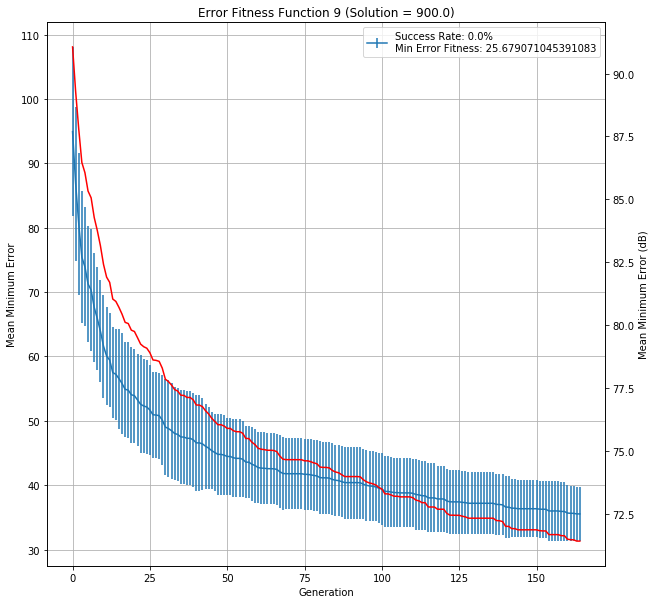

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.5_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.5,27.042409,33.434923,40.847186,37.503639,35.387988,36.65081,...,36.845197,32.045877,32.751468,37.074577,37.763948,32.530986,35.695949,35.5391,3:38:12,50100
